In [1]:
# sys, file and nav packages:
import datetime as dt

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.gridspec as gridspec

# home brew utitilties
import resources.utility_functions as ut
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

plt.ion()

# set some parameters:
today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = '2020-03-01'
end_date ='2021-10-01'

author = "analyst@hammerdirt"

# set the fail rate to test
a_fail_rate = 50

# name of the output folder:
name_of_project = 'alpes-valaisannes'

# set the maps
bassin_map = PILImage.open("resources/maps/alpesvalaisannes.jpeg")
# land_use_map = PILImage.open("resources/maps/land_use_aare.jpeg")

# the search term for the river bassin
bassin_name = 'les-alpes'

# use water_name_slug
lakes_of_interest = ['alpes-']
lake_colors=["darkblue", 'aquamarine', 'dodgerblue', 'teal']

# the names for the survey area and the cumulative data
level_names = ["Les Alpes","All survey areas"]

# the scale for pieces per meter and the column and chart label for the units
reporting_unit = 100
unit_label = 'p/100m'

# add the folder to the directory tree:
project_directory = ut.make_project_folder('output', name_of_project)

# colors for gradients
colors = ['beige', 'navajowhite', 'tan', 'sandybrown','coral', 'salmon', 'sienna', 'maroon','red']
nodes = [0.0, 0.12, 0.24, 0.36, 0.48, 0.6, 0.72, 0.84, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

# get your data:
aldata = pd.read_csv("resources/checked_alpes_survey_data.csv")
sdata = pd.read_csv("resources/checked_sdata_eos_2020_21.csv")
survey_data = pd.concat([aldata, sdata])
river_bassins = ut.json_file_get("resources/river_basins.json")
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfDims = pd.read_csv("resources/corrected_dims.csv")

# set the index of the beach data to location slug
alpb = dfBeaches[dfBeaches.river_bassin == 'les-alpes'].copy()
alpb = dfBeaches[dfBeaches.river_bassin == 'les-alpes'].copy()
alpb['slug'] = alpb.slug.apply(lambda x: x.replace('clean-up-tour-', ''))
dfBeaches = pd.concat([alpb, dfBeaches[dfBeaches.river_bassin != 'les-alpes']])
dfBeaches.set_index('slug', inplace=True)

# map locations to feature names
location_wname_key = dfBeaches.water_name_slug

# convenience function for doing land use correlations
def make_plot_with_spearmans(data, ax, n):
    sns.scatterplot(data=data, x=n, y=unit_label, ax=ax, color='black', s=30, edgecolor='white', alpha=0.6)
    corr, a_p = stats.spearmanr(data[n], data[unit_label])
    return ax, corr, a_p

# index the code data
dfCodes.set_index("code", inplace=True)

# these descriptions need to be shortened for display
dfCodes = sut.shorten_the_value(["G74", "description", "Insulation: includes spray foams"], dfCodes)
dfCodes = sut.shorten_the_value(["G940", "description", "Foamed EVA for crafts and sports"], dfCodes)
dfCodes = sut.shorten_the_value(["G96", "description", "Sanitary-pads/tampons, applicators"], dfCodes)
dfCodes = sut.shorten_the_value(["G178", "description", "Metal bottle caps and lids"], dfCodes)
dfCodes = sut.shorten_the_value(["G82", "description", "Expanded foams 2.5cm - 50cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G81", "description", "Expanded foams .5cm - 2.5cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G117", "description", "Expanded foams < 5mm"], dfCodes)
dfCodes = sut.shorten_the_value(["G75", "description", "Plastic/foamed polystyrene 0 - 2.5cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G76", "description", "Plastic/foamed polystyrene 2.5cm - 50cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G24", "description", "Plastic lid rings"], dfCodes)
dfCodes = sut.shorten_the_value(["G33", "description", "Lids for togo drinks plastic"], dfCodes)
dfCodes = sut.shorten_the_value(["G3", "description", "Plastic bags, carier bags"], dfCodes)
dfCodes = sut.shorten_the_value(["G204", "description", "Bricks, pipes not plastic"], dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code descriptions
code_material_map = dfCodes.material

(lesalpes)=

# The Alpes and the Jura

The Alpes and the Jura (les Alpes) is a survey area configured and managed by the Summit Foundation. The Summit Foundation conducts [clean up events](https://www.summit-foundation.org/en/) throughout the Swiss Alpes as part of the summer clean up tour a series of litter-surveys were conducted. Specifically they wanted to answer two questions:

1. How can data collection be integrated into the current business model
2. How do surveys conducted on mountain trails compare to those on the waters edge

The purpose of the clean up events are to remove as much debris as possible from a defined area, the limits on how much can be removed is related to the resources at hand. A litter survey is concerned with what exactly is being found and maintaining a count of the objects within a defined area. In this sense a clean-up event is approaching the litter problem from the perspective of attenuation or mitigation and the litter-survey is providing the data necessary to improve prevention.

## Survey methods

In total there were twenty litter-surveys conducted by Summit foundation. Initially two methods were selected:

1. Survey a section of trail for a defined distance and width
2. Survey the arrival/departure of the lift line

The survey procedure remains the same under both conditions:

1. A section of trail or surface area is measured
2. All visible pollutants are removed counted and classified.
3. The results and dimensions are recorded

The difference between the two methods is the way the limits of survey area are defined. When a trail is used the limits of the survey area are defined by the trail itself, not the surveyor. In the summer time the barriers and signs that mark out the areas for lift lines have all been removed, making it difficult for the surveyor to accurately determine the correct limits.

## Survey area cumulative totals

*Map of survey area _Les Alpes_, summer clean up tour 2021*


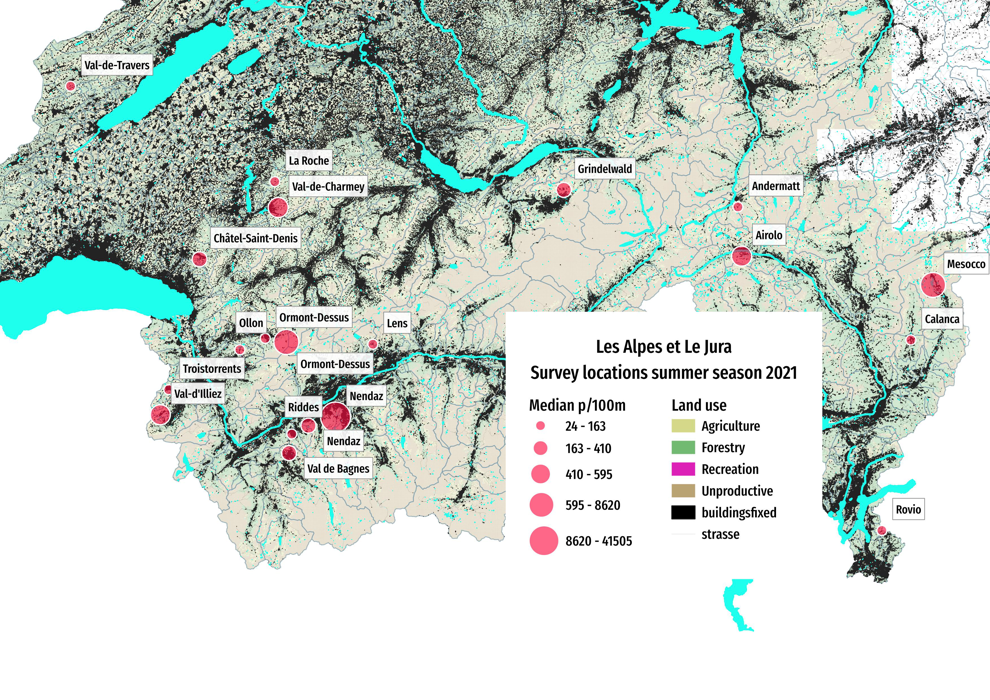

In [2]:
output = io.BytesIO()
bassin_map.thumbnail((1200, 700))
bassin_map.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [3]:
# define the final survey data set here:
a_data = survey_data.copy()

# convert string dates from .csv to timestamp
a_data['date']=pd.to_datetime(a_data['date'], format='%Y-%m-%d')

# slice by start - end date
a_data = a_data[(a_data.date >= start_date)&(a_data.date <= end_date)]

# remove prefixes from survey data
lalpes = a_data[a_data.river_bassin == 'les-alpes'].copy()
lalpes['location'] = lalpes.location.apply(lambda x: x.replace('clean-up-tour-', ''))
alocs = lalpes.location.unique()

lalpes['location'] = lalpes.location.apply(lambda x: x.replace('clean-up-tour-', ''))
a_data = pd.concat([lalpes, a_data[a_data.river_bassin != 'les-alpes']])

# remove prefixes from dims data 
dalpes = dfDims[(dfDims.river_bassin == 'les-alpes')&(dfDims.date >= start_date)&(dfDims.date <= end_date)].copy()
dalpes['location'] = dalpes.location.apply(lambda x: x.replace('clean-up-tour-', ''))
dfDims = pd.concat([dalpes, dfDims[dfDims.river_bassin != 'les-alpes']])

# make a loc_date column from the survey data
a_data['loc_date']=tuple(zip(a_data.location, a_data.date))

# scale the streets to kilometers
a_data['streets'] = a_data.streets.astype('int')

# save the data before aggregating to test
before_agg = pd.read_csv("resources/checked_alpes_survey_data_be.csv")

# a common aggregation
agg_pcs_quantity = {unit_label:'sum', 'quantity':'sum'}

# the daily survey totals of all the data for the survey period
a_dt = a_data.groupby(['loc_date', 'date',"location"], as_index=False).agg(agg_pcs_quantity)

# define the feature data
fd = a_data[(a_data.river_bassin == 'les-alpes')].copy()

# the totals for each survey and the locations in the feature data
fd_dt=fd.groupby(['loc_date', 'date','month', 'location'], as_index=False).agg(agg_pcs_quantity)

# the unique locations and samples
fd_locs = fd.location.unique()
fd_samps = fd.loc_date.unique()

# gather the dimensional data for the time frame from dfDims
# match records to survey data
fd_dims= dfDims.copy()

# make a loc_date column and get the unique values
fd_dims['loc_date'] = list(zip(fd_dims.location, fd_dims.date))

# key the quantity from the survey totals to the dimensional data
try_this = {(x[0],dt.datetime.strftime(x[1].to_pydatetime(), "%Y-%m-%d")):fd_dt[fd_dt.loc_date == x]['quantity'].to_numpy()[0] for x in fd_dt.loc_date.unique()}

# map quantity per survey to the dims data
fd_dims['quantity'] = fd_dims.loc_date.map(lambda x: ut.use_this_key(x, try_this))

# keep the dims that did not get tagged with a qty
no_qty = fd_dims[fd_dims.quantity == 'bad key']

# drop the dims that did not match
som_dims = fd_dims[fd_dims.quantity != 'bad key'].copy()

# identify the surveys with no matching dimensional data
no_matching_dim_records = [x for x in list(fd_samps) if x not in list(fd_dims.loc_date.unique())]

# survey totals
dt_all = a_data.groupby(['loc_date','location','river_bassin', 'date'], as_index=False).agg(agg_pcs_quantity)

# gather the municpalities and the population:
fd_pop_map = dfBeaches.loc[fd.location.unique()][['city','population']].copy()
fd_pop_map.drop_duplicates(inplace=True)
fd_pop_map.set_index('city', drop=True, inplace=True)

# code totals for the river bassin
fd_code_t= fd.groupby(['code', 'groupname'], as_index=False).agg({'quantity':'sum', 'fail':'sum', unit_label:'median'})
fd_code_t.rename(columns={"groupname":'utility'}, inplace=True)
fd_code_t["% of total"] = fd_code_t.quantity/fd_code_t.quantity.sum()
fd_code_t.set_index('code', inplace=True)
fd_code_t.sort_values(by='quantity', ascending=False, inplace=True)
fd_code_t['material'] = fd_code_t.index.map(lambda x: code_material_map[x])
fd_code_t['item'] = fd_code_t.index.map(lambda x: code_description_map.loc[x])
fd_code_t["% of total"] = (fd_code_t["% of total"]*100).round(1)
fd_code_t["fail rate"] = ((fd_code_t["fail"]/len(fd.loc_date.unique()))*100).round(1)

# objects with a fail rate of > 50% in the survey area
most_common = fd_code_t[fd_code_t["fail rate"] > 50].sort_values(by='quantity', ascending=False)

# material totals:
fd_mat_t = fd_code_t[['material', 'quantity']].groupby('material', as_index=False).quantity.sum()
fd_mat_t["% of total"] = fd_mat_t.quantity/fd_mat_t.quantity.sum()

# map total quantity per feature:
qty_all_features = fd.groupby("location").quantity.sum()

# summary statistics:
fd_n_samps = len(fd_samps)
fd_n_obj = fd.quantity.sum()
fd_n_locs = len(fd_locs)
fd_n_munis = len(fd_pop_map.index)
fd_effected_population = fd_pop_map.sum()

lakes = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['water_name'].unique()
rivers = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'r')]['water_name'].unique()

obj_string = '{:,}'.format(fd_n_obj)
surv_string = '{:,}'.format(fd_n_samps)
pop_string = '{:,}'.format(int(fd_effected_population[0]))

date_quantity_context = F"For the period between {start_date[:-3]} and {end_date[:-3]}, {obj_string } objects were removed and identified in the course of {surv_string} surveys."
geo_context = F"Those surveys were conducted at {fd_n_locs} different locations."
admin_context = F"There are {fd_n_munis} different municipalities included with a combined population of $\\approx$ {pop_string}."
munis_joined = ', '.join(sorted(fd_pop_map.index))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context } {admin_context}

\n\n{munis_joined}"""

In [4]:
md(lake_string)


For the period between 2020-03 and 2021-10, 7,776 objects were removed and identified in the course of 20 surveys. Those surveys were conducted at 20 different locations. There are 18 different municipalities included with a combined population of $\approx$ 70,606.



Airolo, Andermatt, Calanca, Châtel-Saint-Denis, Grindelwald, La Roche, Lens, Mesocco, Nendaz, Ollon, Ormont-Dessus, Riddes, Rovio, Troistorrents, Val de Bagnes, Val-d'Illiez, Val-de-Charmey, Val-de-Travers

### Sample totals

The beach-litter survey results from the clean-up events.

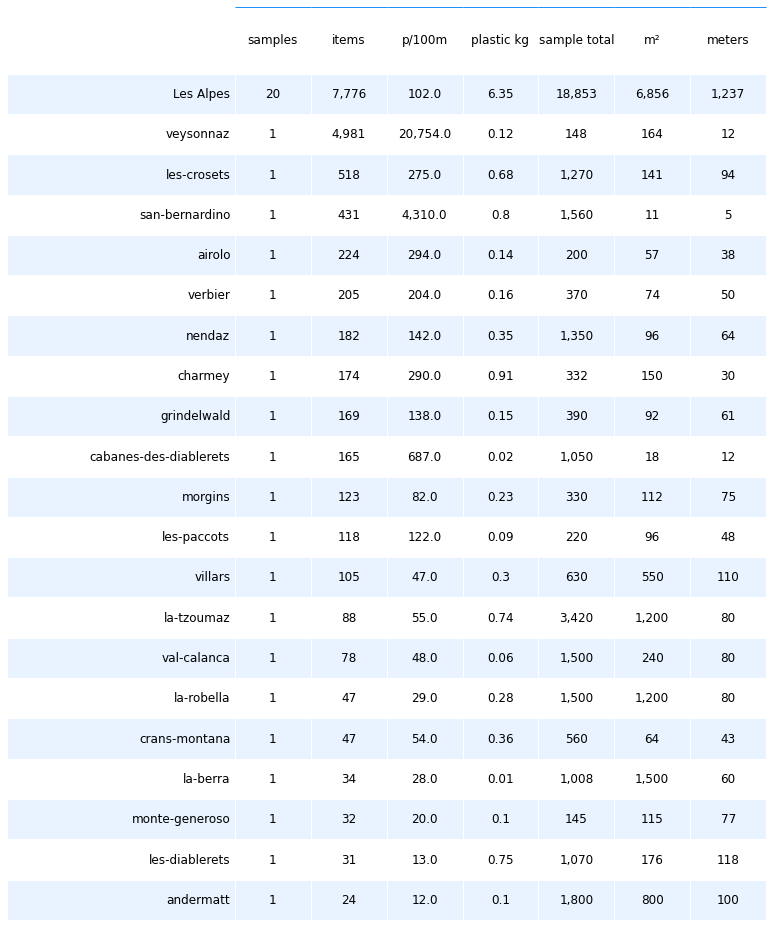

In [5]:
# aggregate the dimensional data down to the lake or river
som_dims[unit_label] = ((som_dims.quantity/som_dims.length)*50).astype('int')

agg_for_table = {
    'quantity':'sum',
    unit_label:'mean',
    'total_w':'sum',
    'mac_plast_w':'sum',
    'mic_plas_w':'sum',
    'area':'sum',
    'length':'sum',
    'num_parts_other':'sum',
    'num_parts_staff':'sum',
    'time_minutes':'sum'
    
}

dims_table = som_dims.groupby(["location"]).agg(agg_for_table )

# collect the number of samples from the survey total data:
for name in dims_table.index:
    dims_table.loc[name, 'samples'] = fd_dt[fd_dt.location == name].loc_date.nunique()

# get the sum of all survey areas
dims_table.loc["Les Alpes"]= dims_table.sum(numeric_only=True, axis=0)

dims_table.loc["Les Alpes", unit_label] = som_dims.groupby(["location"])[unit_label].sum().median()

# for display
dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)
dims_table.rename(columns={'samples':'samples','quantity':'items', 'total_w':'total kg', unit_label:unit_label, 'mac_plast_w':'plastic kg', 'mic_plas_w':'sample total', 'area':'m²', 'length':'meters'}, inplace=True)

# order the columns
dims_table = dims_table[['samples', *dims_table.columns[:-1]]]

# format kilos
dims_table['plastic kg'] = dims_table['plastic kg']/1000

# format for printing
dims_table.rename(columns={'num_parts_other':'participants', 'num_parts_staff':'staff', 'time_minutes':'time'}, inplace=True)

# numerical types and columns
tints = ['samples', 'items', 'total kg', 'sample total', 'm²', 'participants', 'staff', 'time', 'meters']
twodec = [unit_label, 'plastic kg' ]

dims_table[tints] = dims_table[tints].astype('int')
dims_table[twodec] = dims_table[twodec].round(2)
dims_table['time'] = (dims_table['time']/60).astype('int')

commas = ['items','total kg', 'sample total', 'meters', 'm²', unit_label]

dims_table[commas] = dims_table[commas].applymap(lambda x: F"{x:,}")

# table one
data = dims_table.reset_index()
table_one = dims_table[['samples', 'items',unit_label,"plastic kg","sample total", "m²", "meters"]].copy()
table_one.reset_index(inplace=True, )

a_color='dodgerblue'

fig, axs = plt.subplots(figsize=(len(table_one.columns)*1.7,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.3, *[.1]*7], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Event totals

The total amount of trash removed and number of participants.

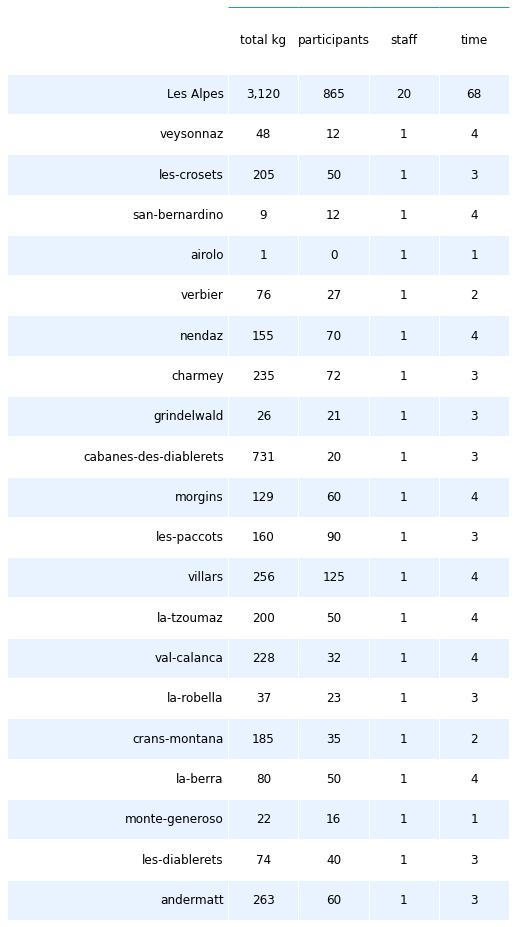

In [6]:
# table two event totals
table_two = dims_table[["total kg", "participants","staff", "time"]].copy()
table_two.reset_index(inplace=True, )

fig, axs = plt.subplots(figsize=(len(table_two.columns)*1.8,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_two.values,  colLabels=table_two.columns, colWidths=[.44, *[.14]*4], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_two.values,table_two.columns, a_color, s_et_bottom_row=False)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

## Land use profile of the survey locations

The land use profile is the percent of total area attributed to each land use category within a 1500m radius of each survey location.

1. \% of land attributed to buildings
2. \% of land attributed to agriculture
3. \% of land attributed to forestry
4. \% of land attributed to recreation

Streets are reported as the total number of kilometers of streets within the 1500m radius. Intersects is an ordinal ranking of the number of rivers/canals that intersect a lake within 1500m of the survey location.

The ratio of the number of samples completed at the different land use profiles is an objective indicator of the overall environmental and economic conditions that the samples were taken in. The distribution of the land use profile of all the surveys from the IQAASL project is used as a reference value.

See the section [*The land use profile*](luseprofile) for more details.

In [7]:
# explanatory variables:
luse_exp = ['% to buildings', '% to recreation', '% to agg', '% to woods', 'streets', 'intersects']

# columns needed
use_these_cols = ['loc_date' ,'% to buildings', '% to trans', '% to recreation', '% to agg', '% to woods','population','location','streets', 'intersects', 'groupname','code']
# lakes_s = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['location'].unique()

# the land use data of region in question
dfdt = fd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# figure caption
site_string = F"""
*{level_names[0]}: land use attributes of the survey locations. Distribution of samples with respect to land use.* 
"""
md(site_string)


*Les Alpes: land use attributes of the survey locations. Distribution of samples with respect to land use.* 


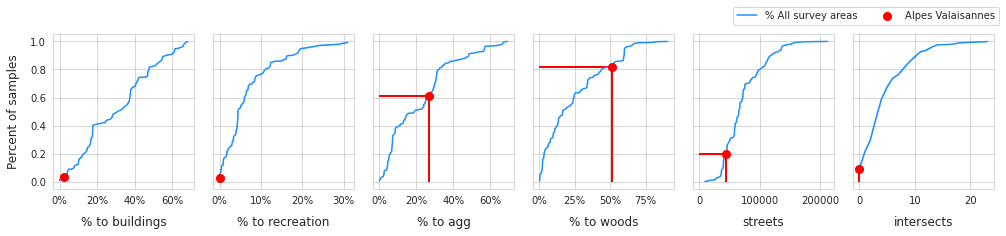

In [8]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,len(luse_exp), figsize=(14,3), sharey=True)

# the land use data of the reference value
datax = a_data.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# work off the copy
data = dfdt.copy()

for i, n in enumerate(luse_exp):    
    
    ax=axs[i]    
    # get the empirical distribution of the independent variable
    the_data = ECDF(datax[n].values)
        
    # plot that
    sns.lineplot(x=the_data.x, y=the_data.y, ax=ax, color='dodgerblue', label="% All survey areas")
    
    # get the median from region of interest
    the_median = data[n].median()
    
    # get its position reference the surrounding survey area
    a = (stats.percentileofscore(the_data.x, the_median))/100
    
    # plot the median and drop horzontal and vertical lines
    ax.scatter([the_median], a, color='red',s=50, linewidth=2, zorder=100, label="Alpes Valaisannes")
    ax.vlines(x=the_median, ymin=0, ymax=a, color='red', linewidth=2)
    ax.hlines(xmax=the_median, xmin=0, y=a, color='red', linewidth=2)
    
    # save the handels and labels but remove them from the ax    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # format the % of total on the xaxis:
    if i <= 3:
        if i == 0:            
            ax.set_ylabel("Percent of samples", **ck.xlab_k)
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, 0, '%'))        
    else:
        pass
    ax.set_xlabel(n, **ck.xlab_k)

plt.tight_layout()
fig.legend(handles, labels, bbox_to_anchor=(1,1.1), loc='upper right', ncol=2)
plt.show()

The locations in the Alpes survey area had a higher percentage of land attributed to forestry and aggriculture and a lower percentage of land attributed to buildings and recreation than the locations in IQAASL.

The aggregated results demonstrate the difference between the two survey methods. The three locations with the highest p/100m  also have the shortest length. In the case of cabanes-des-diablerets the meter² is equal to the length, suggesting that a small area was done around a structure or building. Veysonnaz is the arrival of a ski lift line.

The difference in methods produces markedly different results. Furthermore, these two locations were selected specifically for inventory because of the surveyors previous experiences. Because of the differences in dimensions and methods the survey results from veysonnaz, san-beranardino and cabanes-des-diablerets are not considered in the proceeding analysis.

## Survey results walking trails

The survey results at Veysonnaz and Cabanes-des-Diablerets are excluded from this analysis based on the findings of the aggregated results.

In [9]:
remove = ['veysonnaz', 'cabanes-des-diablerets', 'san-bernardino']

data =fd_dt[~fd_dt.location.isin(remove)].copy()

nvsn = data.location.unique()

# make a df of survey totals with date as index
# only the surveys from all other survey areas
dts_date = a_dt[(~a_dt.location.isin([*nvsn, *remove]))].copy()

# figure caption
chart_notes = F"""
*__Left:__ All survey areas, {start_date[:7]} through {end_date[:7]}, n=403. All samples lakes/rivers and walking trails*
"""
md(chart_notes )


*__Left:__ All survey areas, 2020-03 through 2021-10, n=403. All samples lakes/rivers and walking trails*


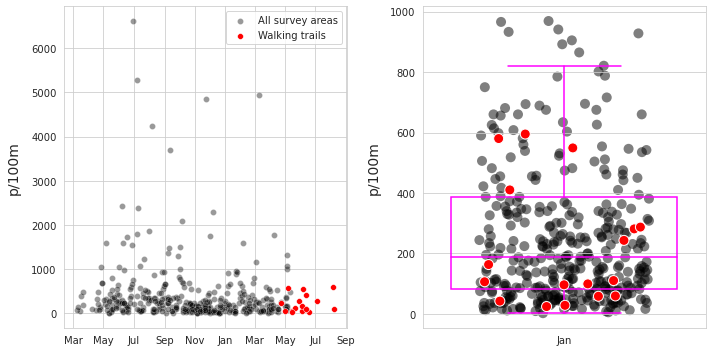

In [10]:
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html
months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter('%b')
days = mdates.DayLocator(interval=7)

fig, axs = plt.subplots(1,2, figsize=(10,5))

ax = axs[0]

# there is a big value in here, that should be seen.
sns.scatterplot(data=dts_date, x='date', y=unit_label, color='black', alpha=0.4, label=level_names[1], ax=ax)
sns.scatterplot(data=data, x='date', y=unit_label, color='red', s=34, ec='white',label="Walking trails", ax=ax)

ax.set_xlabel("")
ax.set_ylabel(unit_label, **ck.xlab_k14)

ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(months_fmt)

axtwo = axs[1]

box_props = {
    'boxprops':{'facecolor':'none', 'edgecolor':'magenta'},
    'medianprops':{'color':'magenta'},
    'whiskerprops':{'color':'magenta'},
    'capprops':{'color':'magenta'}
}
sns.boxplot(data=dts_date, y=unit_label, color='black',  ax=axtwo, showfliers=False, **box_props, zorder=1)
sns.stripplot(data=dts_date[dts_date[unit_label] <= 1000], s=10, y=unit_label, color='black', ax=axtwo, alpha=0.5, jitter=0.3, zorder=0)
sns.stripplot(data=data, y=unit_label, color='red', s=10, ec='white',linewidth=1, ax=axtwo, jitter=0.3, zorder=2)

axtwo.set_xlabel("")
axtwo.set_ylabel(unit_label, **ck.xlab_k14)

axtwo.xaxis.set_minor_locator(days)
axtwo.xaxis.set_major_formatter(months_fmt)

plt.tight_layout()
plt.show()
plt.close()

*__Right:__ Distribution of survey results, outliers removed.* 

### Summary data and material types

In [11]:
# figure caption
summary_of_survey_totals = F"""
*__Left:__ Walking trails summary of survey totals*
"""
md(summary_of_survey_totals)


*__Left:__ Walking trails summary of survey totals*


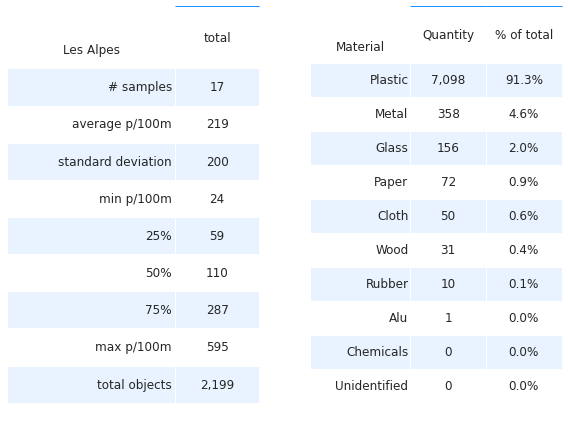

In [13]:
# the labels for the summary table:
change_names = {'count':'# samples', 
                'mean':F"average {unit_label}",
                'std':'standard deviation', 
                'min p/50m':'min', '25%':'25%',
                '50%':'50%', '75%':'75%',
                'max':F"max {unit_label}", 'min':F"min {unit_label}",
                'total objects':'total objects',
                '# locations':'# locations',
                'survey year':'survey year'
               }

# convenience function to change the index names in a series
def anew_dict(x):
    new_dict = {}
    for param in x.index:
        new_dict.update({change_names[param]:x[param]})
    return new_dict  

# select data
# data =fd_dt[fd_dt.location != 'veysonnaz'].copy()

# get the basic statistics from pd.describe
desc_2020 = data[unit_label].describe().round(2)

# add project totals
desc_2020['total objects'] = data.quantity.sum()
desc_2020['# locations'] = fd.location.nunique()

# change the names
combined_summary = pd.Series(anew_dict(desc_2020))

# format the output for printing:
not_formatted = combined_summary[-1]
combined_summary = [(x, "{:,}".format(int(combined_summary[x]))) for x in combined_summary.index[:-1]]
combined_summary.append((desc_2020.index[-1], int(not_formatted) ))

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [level_names[0], 'total']

axone = axs[0]
ut.hide_spines_ticks_grids(axone)

a_table = axone.table(cellText=combined_summary[:-1],  colLabels=a_col, colWidths=[.5,.25,.25], loc='lower center', bbox=[0,0,1,1])
the_material_table_data = sut.make_a_summary_table(a_table,combined_summary[:-1],a_col, s_et_bottom_row=False)

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
ut.hide_spines_ticks_grids(axtwo)
data = fd_mat_t.copy()

# column names for display
cols_to_use = {'material':'Material','quantity':'Quantity', '% of total':'% of total'}

# sort data before formatting
data.sort_values(by='quantity', inplace=True, ascending=False)

# format results
data['% of total'] =(data['% of total']*100).round(1)
data['quantity']=data.quantity.map(lambda x: '{:,}'.format(x))
data['% of total']=data['% of total'].map(lambda x:F"{x}%")

a_table = axtwo.table(cellText=data.values,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3], loc='lower center', bbox=[0,0,1,1])
the_material_table_data = sut.make_a_summary_table(a_table,data,list(cols_to_use.values()), s_et_bottom_row=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

In [14]:
# figure caption
material_type = F"""
*__Right:__ Walking trails material type and percent of total*
"""
md(material_type)


*__Right:__ Walking trails material type and percent of total*


### The most common objects

The most common objects are **the ten most abundant by quantity found** AND/OR **any object that was indentified in at least 50% of all the surveys**. 

In [15]:
# code totals for les alpes not including veysonnaz
fd_code_t= fd[~fd.location.isin(remove)].groupby(['code', 'groupname'], as_index=False).agg({'quantity':'sum', 'fail':'sum', unit_label:'median'})
fd_code_t.rename(columns={"groupname":'utility'}, inplace=True)
fd_code_t["% of total"] = fd_code_t.quantity/fd_code_t.quantity.sum()
fd_code_t.set_index('code', inplace=True)
fd_code_t.sort_values(by='quantity', ascending=False, inplace=True)
fd_code_t['material'] = fd_code_t.index.map(lambda x: code_material_map[x])
fd_code_t['item'] = fd_code_t.index.map(lambda x: code_description_map.loc[x])
fd_code_t["% of total"] = (fd_code_t["% of total"]*100).round(1)
fd_code_t["fail rate"] = ((fd_code_t["fail"]/len(fd.loc_date.unique()))*100).round(1)

# objects with a fail rate of > 50% in the survey area
most_common = fd_code_t[fd_code_t["fail rate"] >= 50].sort_values(by='quantity', ascending=False)

# the top ten by quantity
most_abundant = fd_code_t.sort_values(by='quantity', ascending=False)[:10]

# merge with most_common and drop duplicates
m_common = pd.concat([most_abundant, most_common]).drop_duplicates()

# get percent of total
m_common_percent_of_total = m_common.quantity.sum()/fd_code_t.quantity.sum()

# figure caption
rb_string = F"""
*Walking trails most common objects: fail rate > {a_fail_rate}%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent {int(m_common_percent_of_total*100)}% of all objects found, {unit_label}: median survey value.*
"""
md(rb_string)


*Walking trails most common objects: fail rate > 50%  and/or top ten by quantity. 
Combined, the ten most abundant objects represent 69% of all objects found, p/100m: median survey value.*


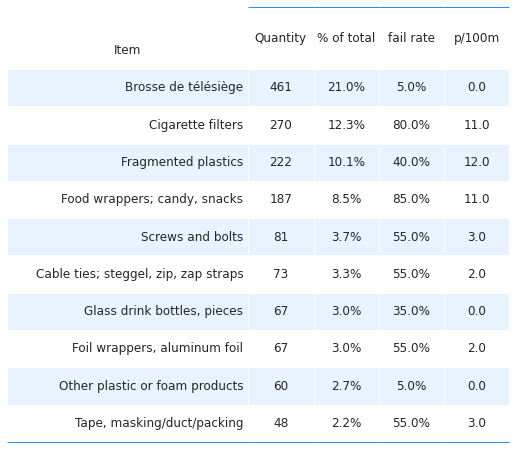

In [16]:
# format values for table
m_common['item'] = m_common.index.map(lambda x: code_description_map.loc[x])
m_common['% of total'] = m_common["% of total"].map(lambda x: F"{x}%")
m_common['quantity'] = m_common.quantity.map(lambda x: '{:,}'.format(x))
m_common['fail rate'] = m_common['fail rate'].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{np.ceil(x)}")

# final table data
cols_to_use = {'item':'Item','quantity':'Quantity', '% of total':'% of total', 'fail rate':'fail rate', unit_label:unit_label}
all_survey_areas = m_common[cols_to_use.keys()].values

fig, axs = plt.subplots(figsize=(9,len(m_common)*.8))

ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(all_survey_areas,  colLabels=list(cols_to_use.values()), colWidths=[.48, .13,.13,.13, .13], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,m_common,list(cols_to_use.values()), a_color)

plt.show()
plt.tight_layout()
plt.close()

### Most common objects results by survey location

In [17]:
rb_string = F"""
*Walking trails most common objects: median {unit_label}*
"""
md(rb_string)


*Walking trails most common objects: median p/100m*


In [19]:
# aggregated survey totals for the most common codes for all the water features 
data=fd[~fd.location.isin(remove)].copy()
m_common_st = data[data.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
m_common_ft = m_common_st.groupby(["location", 'code'], as_index=False)[unit_label].median()

# proper name of water feature for display
# m_common_ft['f_name'] = m_common_ft.water_name_slug.map(lambda x: wname_wname.loc[x][0])

# map the desctiption to the code
m_common_ft['item'] = m_common_ft.code.map(lambda x: code_description_map.loc[x])

# pivot that
m_c_p = m_common_ft[['item', unit_label, 'location']].pivot(columns='location', index='item')
# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

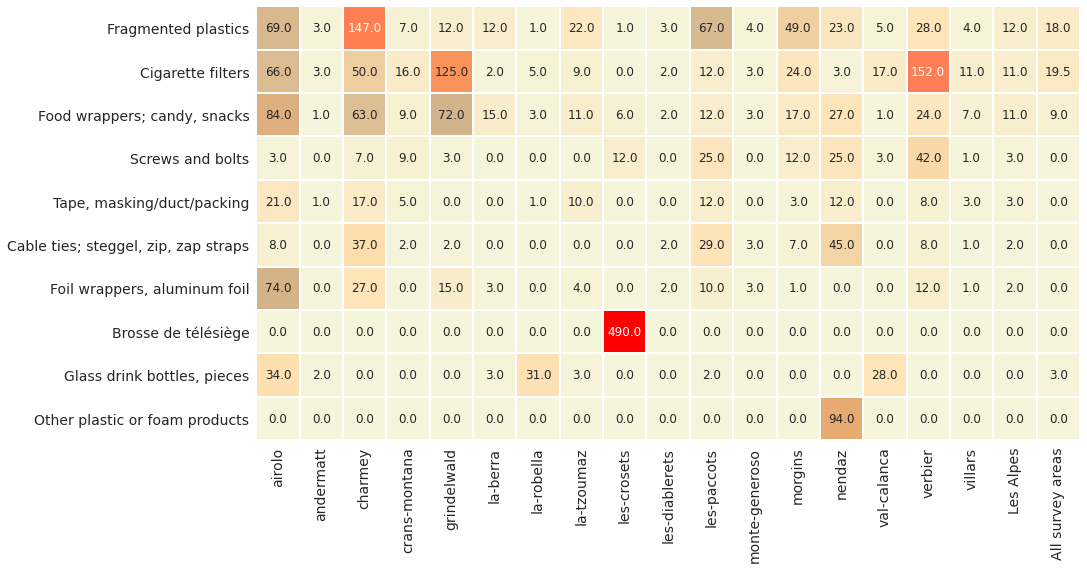

In [20]:
# the aggregated totals for the survey area 
fd_mc = data[data.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
fd_mc = fd_mc.groupby('code', as_index=False)[unit_label].median()

# set the item, index and column name for the aggregated survey area results
fd_mc['item'] = fd_mc.code.map(lambda x: code_description_map.loc[x])
fd_mc.set_index('item', inplace=True)

# the column of values for the survey area
fd_mc[level_names[0]] = fd_mc[unit_label]

# the column value for all the survey areas
a_s_a = a_data[a_data.code.isin(m_common.index)].groupby(["location", 'loc_date','code'], as_index=False).agg(agg_pcs_quantity)
a_s_a = a_s_a.groupby('code', as_index=False)[unit_label].median()
a_s_a['item'] = a_s_a.code.map(lambda x: code_description_map.loc[x])
a_s_a.set_index('item', inplace=True)
a_s_a[level_names[1]] = a_s_a[unit_label]

# merge all that
ad_t_ten = pd.concat([m_c_p, fd_mc[level_names[0]], a_s_a[level_names[1]],], axis=1).sort_values(by=level_names[0], ascending=False)

# chart that
fig, ax  = plt.subplots(figsize=(len(ad_t_ten.columns)*.8,len(ad_t_ten)*.9))
axone = ax

sns.heatmap(ad_t_ten, ax=axone,  annot=True,vmax=300, annot_kws={"fontsize":12}, cmap=cmap2, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both')

plt.setp(axone.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.close()

*Brosse de télésiège: the cabin brushes used to remove ice and snow from skilifts can get seperated from the instalation. Leaving thousands of heavy guage plastic filaments.*

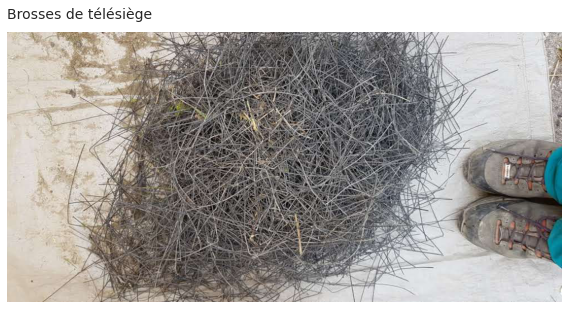

In [21]:
teamv = PILImage.open("resources/images/veysonnaz_brosse.jpg")

# display images
fig, ax = plt.subplots(figsize=(8,4.5))

axone=ax
ut.hide_spines_ticks_grids(axone)
axone.imshow(teamv);
axone.set_title("Brosses de télésiège", **ck.title_k14)

plt.tight_layout()
plt.show()

### Utility of the objects found

The utility type is based on the utilization of the object prior to it being discarded. Objects that are found are placed into one of the predefined categories. Those categories are grouped according to utilization.

*  **wastewater**: items released from water treatment plants includes items likely toilet flushed   
*  **micro plastics (< 5mm)**: fragmented plastic items and pre-production plastic resins
*  **infrastructure**: items related to construction and maintenance of all infrastructure items 
*  **food and drink**: primarily single use plastic items related to consuming food and drinks outdoors  
*  **agriculture**: primarily industrial sheeting includes mulch films
*  **tobacco**: primarily cigarette ends includes all smoking related material 
*  **recreation**: includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco items   
*  **packaging non food and drink**: packaging or wrapping material not identified as food, drink nor tobacco related  
*  **plastic fragments**: foam and plastic fragments of indeterminate origin and use 
*  **personal items**: accessories, hygiene and clothing related 

See the annex for the complete list of objects identified, includes category and group classification

In [22]:
cg_poft = F"""
<br></br>
Walking trails utility of objects found: % of total by water feature. Fragmented objects with no clear identification remain classified by size
"""
md(cg_poft)


<br></br>
Walking trails utility of objects found: % of total by water feature. Fragmented objects with no clear identification remain classified by size


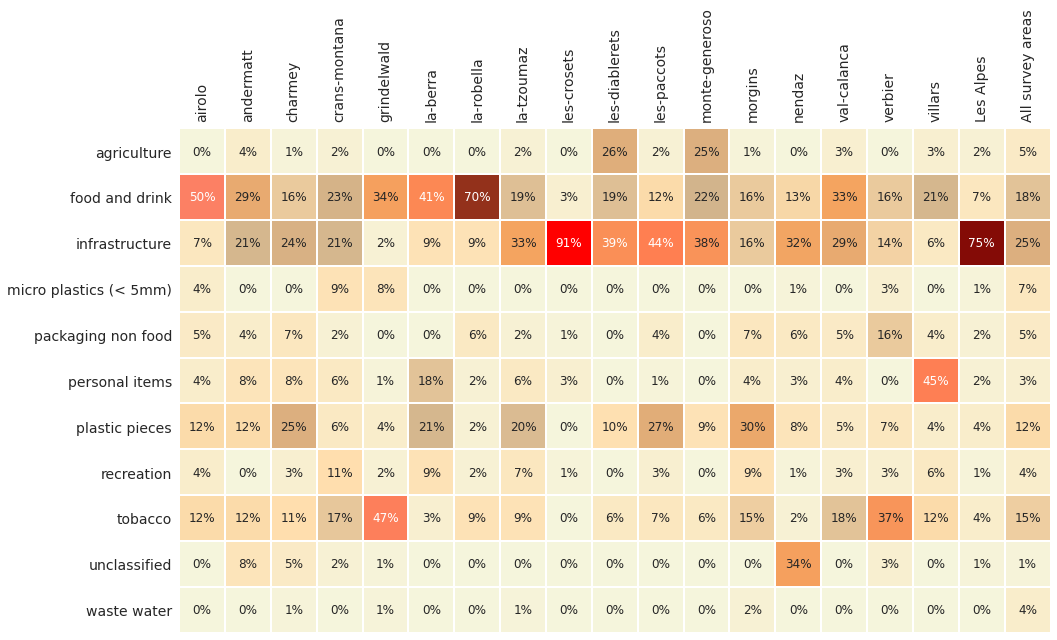

In [23]:
# code groups aggregated by survey for each water feature in the survey area
cg_t = data.groupby(["location",'loc_date', 'groupname'], as_index=False).agg(agg_pcs_quantity)

# get the fail rates for each group per survey
cg_t['fail']=False
cg_t['fail'] = cg_t.quantity.where(lambda x: x == 0, True)

# aggregate all that for each water feature
cg_t = cg_t.groupby(["location", 'groupname'], as_index=False).agg({unit_label:'median', 'quantity':'sum', 'fail':'sum', 'loc_date':'nunique'})

# quantity per water feature
cg_tq = cg_t.groupby("location").quantity.sum()

# assign the water feature total to each record
for a_feature in cg_tq.index:
    cg_t.loc[cg_t.location == a_feature, 'f_total'] = cg_tq.loc[a_feature]

# get the percent of total for each group for each water feature
cg_t['pt'] = (cg_t.quantity/cg_t.f_total).round(2)

# pivot that
data_table = cg_t.pivot(columns="location", index='groupname', values='pt')

# add a column for the survey area totals and the national totals:
# the aggregated totals for the survey area

# the median value is always calculated from the survey result:
sa_cg = fd.groupby(["location", 'loc_date','groupname'], as_index=False).agg(agg_pcs_quantity)

# aggregate all data
fd_cg = sa_cg.groupby('groupname', as_index=False).agg({unit_label:'median', 'quantity':'sum'})

# add percent of total column
fd_cg['pt'] = (fd_cg.quantity/fd_cg.quantity.sum()).round(2)

# set the index
fd_cg.set_index('groupname', inplace=True)

# name survey area column
fd_cg[level_names[0]] = fd_cg['pt']

# repeat for all data
a_s_a = a_data.groupby(["location", 'loc_date','groupname'], as_index=False).agg(agg_pcs_quantity)
a_s_a = a_s_a.groupby('groupname', as_index=False).agg({unit_label:'median', 'quantity':'sum'})
a_s_a['pt'] = (a_s_a.quantity/a_s_a.quantity.sum()).round(2)
a_s_a.set_index('groupname', inplace=True)
a_s_a[level_names[1]] = a_s_a['pt']

data = pd.concat([data_table, fd_cg[level_names[0]], a_s_a[level_names[1]]], axis=1)

fig, ax = plt.subplots(figsize=(len(ad_t_ten.columns)*.8,len(ad_t_ten)*.9))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt='.0%', linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
# median p/50m solve cg_t for unit_label
data_table = cg_t.pivot(columns="location", index='groupname', values=unit_label)

# survey area median
fd_cg[level_names[0]] = fd_cg[unit_label]

# all survey area median
a_s_a[level_names[1]] = a_s_a[unit_label]

# merge with data_table
data = pd.concat([data_table, fd_cg[level_names[0]], a_s_a[level_names[1]]], axis=1)

cg_medpcm = F"""
<br></br>
Walking trails utility of objects found: median {unit_label}. Fragmented objects with no clear identification remain classified by size
"""
md(cg_medpcm)


<br></br>
Walking trails utility of objects found: median p/100m. Fragmented objects with no clear identification remain classified by size


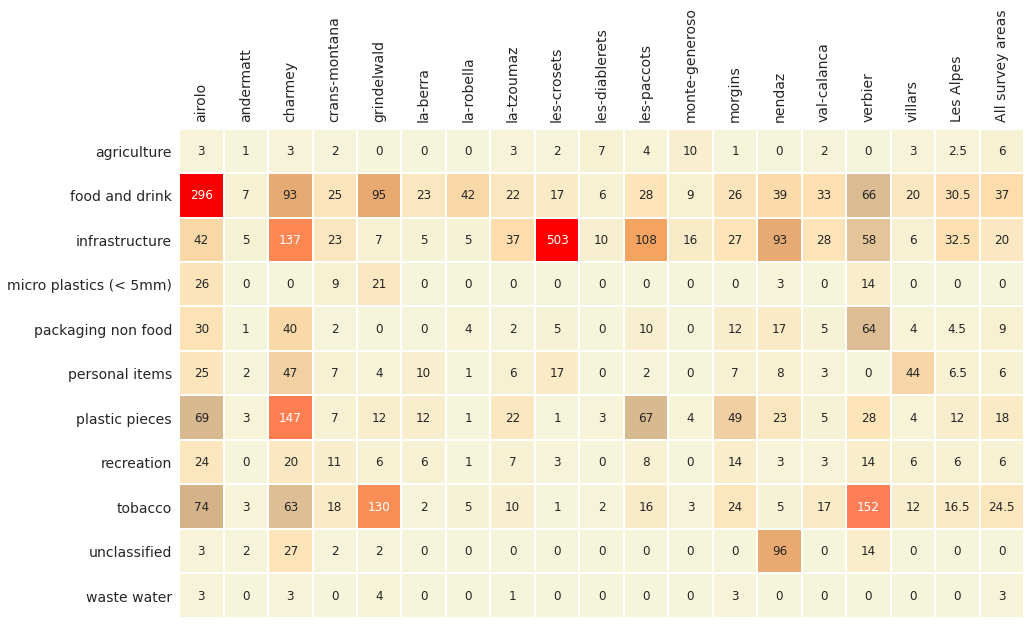

In [25]:
fig, ax = plt.subplots(figsize=(len(ad_t_ten.columns)*.8,len(ad_t_ten)*.9))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt='g', cbar=False, linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

### Percentile ranking with respect to land use

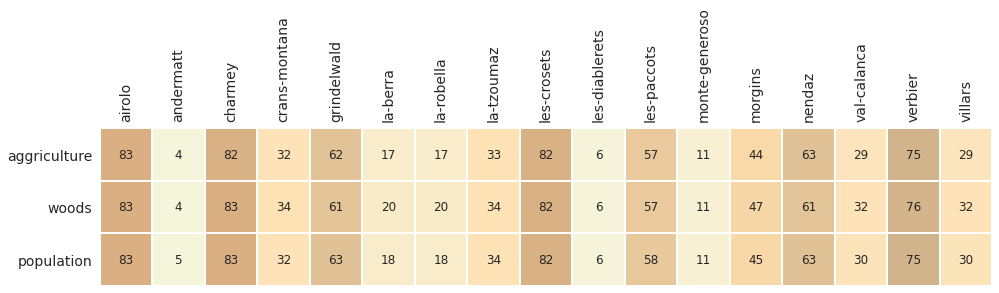

In [26]:
# get the percentile ranking under each condition:
# define land use ranges based on the sample data
this_range = (fd["% to agg"].min(), fd["% to agg"].max())
this_range_w = (fd["% to woods"].min(), fd["% to woods"].max())
this_range_p = (fd["population"].min(), fd["population"].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data['% to agg'] >= this_range[0])&(a_data['% to agg'] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data['% to woods'] >= this_range_w[0])&(a_data['% to woods'] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data['population'] >= this_range_p[0])&(a_data['population'] <= this_range_p[1])].copy()

# remove alpes valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(['loc_date','location','% to agg'], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(['loc_date','location','% to woods'], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(['loc_date','location','% to woods', 'population'], as_index=False)[unit_label].sum()

table_data = {}
for i,x in enumerate(fd_dt[~fd_dt.location.isin(remove)].location.unique()):
    this_num = fd_dt.loc[fd_dt.location == x, unit_label].values[0]
    a = (stats.percentileofscore(data[unit_label].to_numpy(), this_num))
    b = (stats.percentileofscore(data_p[unit_label].to_numpy(), this_num))
    c = (stats.percentileofscore(data_w[unit_label].to_numpy(), this_num))
    table_data.update({x:{'aggriculture':a, 'woods':b, 'population':c}})

t_data = pd.DataFrame(table_data)
t_data = t_data.astype('int')
t_data.reset_index(inplace=True)
t_data.rename(columns={'index':'variable'}, inplace=True)
t_data.set_index('variable', inplace=True, drop=True)

fig, ax = plt.subplots(figsize=(len(fd_dt.location.unique())*.8,5))

axone = ax
sns.heatmap(t_data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt='g', cbar=False, linewidth=.1, square=True, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both', labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

## Discussion

### Alpes survey results compared to shoreline surveys

The median survey value was 110 p/100m for the 17 locations, this is less than the median value of all the other survey areas (189). Objects related to consumption such as food and drink or tobacco were a smaller percent of the total and had a lower p/100m rate compared to the results from locations on the waters edge. This difference could be in part due to the low levels of urbanization that characterizes the Alpes survey area with respect to all other survey areas.

Objects related to infrastructure and maintenance are 78% of the total, more than 3X the national average. Alot of this can be attributed to ski-lift brushes which were found in large quantities at les-crosets.  Ski lift brushes are used to remove the snow from the top of covered ski-lift-chairs as they approach the embarkation site. As such these will most likely be a recurring item in the survey list. Not unlike _industrial pellets_ or _small expanded foams_ in the aquatic environment, where occasionally large amounts are found at very specific places.

The ratio of infrastructure objects to food and tobacco objects is nearly 7/1, results like these are typical of rural environments where objects related to consumption are not the most prevalent, see [_Shared responsibility_](transport). With respect to land use 10/17 locations had survey results that were lower than the median for communities from all other survey areas that have a similar land use profile.

#### Most common objects

The most common objects are 74\% of the total objects found. Cigarette ends did not exceed the national median in the AV, however there were significant values recorded at Verbier, Grindelwald and Airolo. Specific items from the infrastructure group are represented such as:

1. screws and bolts
2. cable ties
3. masking tape
4. screws and bolts
5. bricks and pipes

However the absence of expanded or extruded polystyrene from the Alpes survey areas most common list is a sharp contrast to all other survey areas where this product alone is $\approx$ 13\% of the total, see [_Lakes and rivers_](allsurveys).

### Implementing litter surveys in the existing business model

A clean-up event covers a relatively large geographic area compared to a beach-litter survey. Volunteers to these events are drawn by the opportunity to take care of the environment AND enjoy some moderate exercise in the company of others. Beach-litter surveys do not offer the same type of activity level and may not be of interest to all volunteers.

Implementing beach litter surveys means offering the experience to volunteers at the event, but maintaining the resources internally to ensure that the survey is completed according to protocol. This includes identifying, counting and entering data. Summit foundation was able to do this by ensuring that there was one person present at each event that could complete the survey.

The surveyors from summit foundation preferred to sample along the lift lines and starting at the arrival and departure of ski lifts. Samples taken this way follow the flow of the event: downhill and within the areas of high traffic. 

Samples that were taken around buildings or other installations produced higher survey results. Confirming what Summit foundation members had identified in previous years. From these experiences the Project manager, Téo Gursoy, explained:

> Indeed, the surveyors concentrate mainly on the sections under the chairlifts, gondolas or at the departure and arrival of these installations which are highly frequented places.

In some instances the density of the objects is so great that the surveyor felt compelled to concentrate on one area by expanding the width of the survey area. M Gursoy described what happened when a surveyor happened on a location that had large quantities of ski-lift brushes:

> However, the surveyor started the trail section at the arrival station of the gondola. The ski-lift brushes quickly caught the surveyors attention who decided to focus on this area alone in order to find out how many of them could be found in this type of area...

The survey results around infrastructure or buildings are not indicative of the state of the environment throughout the domain. Surveys around these structures tend to have higher counts, however they make up only a small portion of the total land use. 

Adjustments had to be made to the software and reporting scheme in order to handle the different types of data that are produced from clean-up events. That included creating new identification codes for specific objects that are found in the Alpes survey area. Furthermore, Summit foundation provided the resources so that one foundation staff member could be trained using the project protocol and software.

### Conclusions

The surveys conducted along the trails and lift lines in the Alpes survey area produced data that was very similar to the data produced from surveys done on the shoreline. However, when surveyors focused their attention around specific infrastructure items the survey counts return extreme values. Survey results on the shoreline would produce the same results if surveys were only conducted at locations where high litter counts were more probable.

Food and drink objects are only 11\% of the total objects found compared to 36\% from the other survey areas. However, infrastructure objects are 75\% of the total in the Alpes versus 18\% at all other survey areas. This is in part due to the difference in human presence when compared to locations at lower altitudes where human presence is a constant throughout the year, thus more of a pressure from food and tobacco objects as opposed to infrastructure.

This first project also demonstrated the feasibility of combining monitoring with popular events. In preparation to monitoring, the members of both teams exchanged ideas and sorted samples together. This permitted both organizations to better understand each other and determine baseline services that could be provided while collecting data for a national report: 

1. Assist in the collection and identification
2. Assist in the data entry
3. Provide charts, graphs and data that can be used by the participating organizations

A beach-litter survey requires 2-4 hours to complete, depending on how many different objects there are. This resource was not accounted for in the operating budget of either organization. Therefore, Summit foundation provided the coordination and infrastructure and hammerdirt provided an additional surveyor and IT support.

The data provided allows for direct comparisons between locations, provided that the same survey method is used. The abundance of infrastructure items relative to food and tobacco items is indicative of surveys completed in rural locations.  How well this data compares to surveys done on the shoreline needs to be explored further. However, cigarette ends, broken glass, fragmented plastics and snack wrappers are among the most common items found on the shoreline.

We thank all the members of Summit Foundation for their help and specifically Olivier Kressmann and Téo Gursoy.

In [27]:
author = author
my_message = "Love what you do. \u2764\ufe0f"
md(F"""
<br></br>
**This project was made possible by the Swiss federal office for the environment.**<br>

>{my_message}<br>

*{author}* pushed the run button on {today}.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br></br>
""")


<br></br>
**This project was made possible by the Swiss federal office for the environment.**<br>

>Love what you do. ❤️<br>

*analyst@hammerdirt* pushed the run button on 2021-10-05.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br></br>


## Annex

### fragmented foams and plastics by size group

These are the components of Gfoam and Gfrags, objects labled "Expanded foams" are grouped with Gfoam the rest are grouped under Gfrags.

In [28]:
frag_foams = F"""
*{level_names[0]} fragmented foams and plastics by size group. 

*median {unit_label}, number of pieces, percent of total*
"""
md(frag_foams)


*Les Alpes fragmented foams and plastics by size group. 

*median p/100m, number of pieces, percent of total*


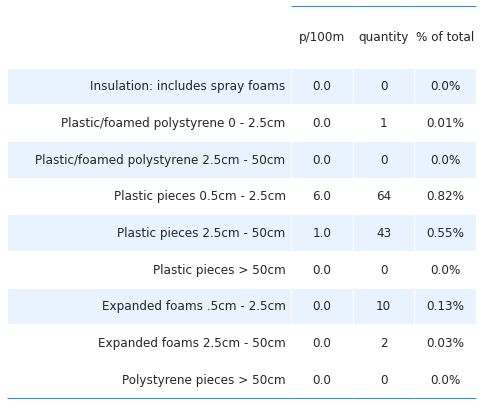

In [29]:
# collect the data before aggregating foams for all locations in the survye area
# the codes for the foams

# remove prefixes from survey data
lalpes = before_agg[before_agg.river_bassin == 'les-alpes'].copy()
alocs = lalpes.location.unique()
lalpes['location'] = lalpes.location.apply(lambda x: x.replace('clean-up-tour-', ''))
before_agg = pd.concat([lalpes, before_agg[before_agg.river_bassin != 'les-alpes']])

some_foams = ['G81', 'G82', 'G83', 'G74']

# the codes for the fragmented plastics
some_frag_plas = list(before_agg[before_agg.groupname == 'plastic pieces'].code.unique())

fd_frags_foams = before_agg[(before_agg.code.isin([*some_frag_plas, *some_foams]))&(before_agg.location.isin(fd_locs))].groupby(['loc_date','code'], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby('code').agg({unit_label:'median', 'quantity':'sum'})

# add code description and format for printing
fd_frags_foams['item'] = fd_frags_foams.index.map(lambda x: code_description_map.loc[x])
fd_frags_foams['% of total'] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams['% of total'] = fd_frags_foams['% of total'].map(lambda x: F"{x}%")
fd_frags_foams['quantity'] = fd_frags_foams['quantity'].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[['item',unit_label, 'quantity', '% of total']]

fig, axs = plt.subplots(figsize=(len(data.columns)*2.1,len(data)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=data.columns, colWidths=[.6, .13, .13, .13], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,data.columns, a_color, s_et_bottom_row=True)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Surveyors

Manager: Teo Gursoy
Organization: Summit Foundation

Hammerdirt staff:
1. Bettina Siegenthaler

### Survey locations

In [30]:
# display the survey locations
pd.set_option('display.max_rows', None)
disp_columns = ['latitude', 'longitude', 'city', 'population', 'streets', '% to buildings']
disp_beaches = dfBeaches.loc[fd_locs][disp_columns]
disp_beaches

,latitude,longitude,city,population,streets,% to buildings
slug,,,,,,
cabanes-des-diablerets,46.338604,7.215525,Ormont-Dessus,1448.0,9417.0,0.000000
val-calanca,46.330718,9.120103,Calanca,199.0,38365.0,0.021708
san-bernardino,46.445947,9.191344,Mesocco,1347.0,43273.0,0.022523
airolo,46.514257,8.607884,Airolo,1501.0,51349.0,0.027221
nendaz,46.162099,7.283486,Nendaz,6623.0,49738.0,0.019886
veysonnaz,46.180334,7.366005,Nendaz,6623.0,65355.0,0.024148
andermatt,46.618327,8.598803,Andermatt,1390.0,22019.0,0.000000
verbier,46.103981,7.224760,Val de Bagnes,10185.0,84078.0,0.271693
crans-montana,46.334214,7.479386,Lens,4198.0,44197.0,0.008439


### Land use profile of survey locations

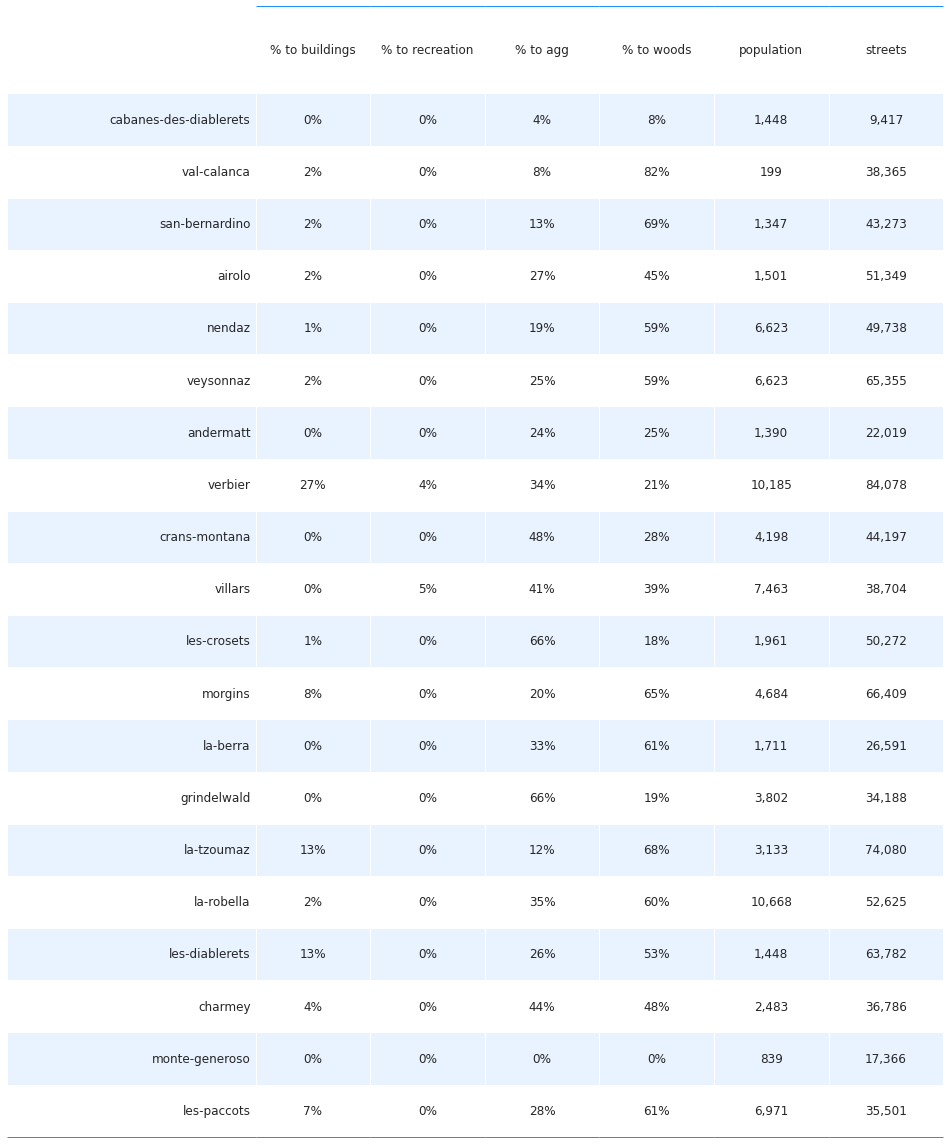

In [31]:
# get the land use profile of AV
lu_prof = fd[['location','% to buildings', '% to recreation', '% to agg', '% to woods','population','streets']].drop_duplicates()

# format for printing
lu_prof.loc[:,lu_prof.columns[1:-2]] = lu_prof.loc[:,lu_prof.columns[1:-2]].applymap(lambda x: F"{int((x*100))}%")
lu_prof.loc[:, lu_prof.columns[5:]] = lu_prof.loc[:, lu_prof.columns[5:]].applymap(lambda x: F"{int(x):,}")

# put that to a table
table_one=lu_prof.copy()

fig, axs = plt.subplots(figsize=(len(table_one.columns)*1.9,len(table_one)*.8))
ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(table_one.values,  colLabels=table_one.columns, colWidths=[.26, *[.12]*7], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,table_one.values,table_one.columns, a_color, s_et_bottom_row=True)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")
plt.tight_layout()
plt.show()

### Les Alpes with respect to land use

The AV have two dominant land use features:

* \% to woods
* \% to agriculture

The results from AV are compared to the other survey results that have either _% to woods_ or _% to agg_ within the same range as AV. The ranges for AV are:

* \% to agg: $\approx$ 20 to 66\%
* \% to woods: $\approx$ 19 to 65\%
* population: $\approx$ 1,961 to 10,185

There are 323 samples from 59 locations that have at least one of the charateristics that are within the ranges from AV.  

In [32]:
# define land use ranges based on the sample data
this_range = (fd["% to agg"].min(), fd["% to agg"].max())
this_range_w = (fd["% to woods"].min(), fd["% to woods"].max())
this_range_p = (fd["population"].min(), fd["population"].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data['% to agg'] >= this_range[0])&(a_data['% to agg'] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data['% to woods'] >= this_range_w[0])&(a_data['% to woods'] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data['population'] >= this_range_p[0])&(a_data['population'] <= this_range_p[1])].copy()

# remove alpes valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(['loc_date','location','% to agg'], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(['loc_date','location','% to woods'], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(['loc_date','location','% to woods', 'population'], as_index=False)[unit_label].sum()
regional = fd.groupby(['loc_date','location','% to agg', '% to woods', 'population'], as_index=False)[unit_label].sum()

# locations that share the characteristics
commonsamps = set(data.loc_date.unique()) & set(data_w.loc_date.unique())& set(data_p.loc_date.unique())
commonlocs = set(data.location.unique()) & set(data_w.location.unique())&set(data_p.location.unique())

# print these out to get the comparison

# print("agg")
# print(this_range)
# print(len(data.location.unique()))
# print(data.loc_date.nunique())
# print("woods")
# print(this_range_w)
# print(len(data_w.location.unique()))
# print(data_w.loc_date.nunique())
# print("p")
# print(this_range_p)
# print(len(data_p.location.unique()))
# print(data_p.loc_date.nunique())
# print(len(commonsamps))
# print(commonlocs)

# make a categorical df for mapping
mat_agg = dfBeaches.loc[data.location.unique()]
mat_agg['match'] = 'agg'
mat_w = dfBeaches.loc[data_w.location.unique()]
mat_w['match'] = 'woods'
mat_p = dfBeaches.loc[data_p.location.unique()]
mat_p['match']='pop'

# merge all that and export to .csv
landusemap = pd.concat([mat_agg, mat_w, mat_p], axis=0)
landusemap.to_csv("output/alpes-valaisannes/lu_comparison.csv", index=False)

*Top left: survey total with respect to % to agg, range=(19%, 66%), locations=59, samples=165*

*Top right: survey total with respect to % to woods, range=(18%, 65%), locations=61, samples=138*

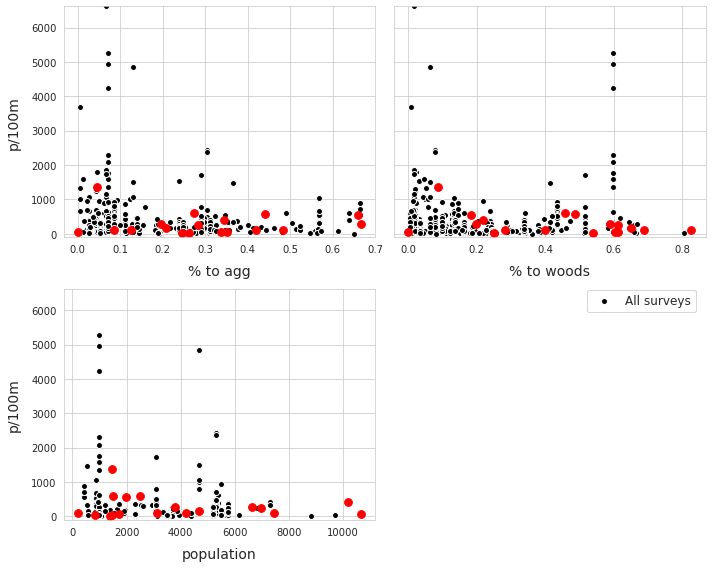

In [33]:
fig, axs = plt.subplots(2,2, figsize=(10,8), sharey=True)

axone=axs[0,0]
axtwo=axs[0,1]
axthree=axs[1,0]
axfour=axs[1,1]

# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data, x="% to agg", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axone, zorder=1)

# point estimates of the percentile ranking based off the edcf of all surveys
# place to store the rankings
rankings = {}

# plot the values for AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to agg"]
    axone.scatter(this_x, this_y, color='red', s=60, zorder=2)

# handle extreme values
axone.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axone.set_ylabel(unit_label, **ck.xlab_k14)
axone.set_xlabel("% to agg", **ck.xlab_k14)

# gather up legend handles
handles, labels = axone.get_legend_handles_labels()
axone.get_legend().remove()

# start axtwo
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_w, x="% to woods", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axtwo, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["% to woods"]
    rankings.update({x:(this_x, this_y)})
    axtwo.scatter(this_x, this_y, color='red', s=60, zorder=2)

# handle extreme values
axtwo.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axtwo.set_ylabel(unit_label, **ck.xlab_k14)
axtwo.set_xlabel("% to woods", **ck.xlab_k14)
axtwo.get_legend().remove()

# start axthree
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_p, x="population", y=unit_label, color='black', alpha=1, linewidth=1, label="All surveys", ax=axthree, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x]["population"]
    rankings.update({x:(this_x, this_y)})
    axthree.scatter(this_x, this_y, color='red', s=60, zorder=2)

# handle extreme values
axthree.set_ylim(-100, max(data[unit_label].to_numpy()))

# start axfour,# clear axfour
ut.hide_spines_ticks_grids(axfour)

# set labels
axthree.set_ylabel(unit_label, **ck.xlab_k14)
axthree.set_xlabel("population", **ck.xlab_k14)
axthree.get_legend().remove()

fig.legend(handles, labels, bbox_to_anchor=(.98,.5), loc="upper right",  fontsize=12)
plt.tight_layout()
plt.show()

### Inventory of all items

In [34]:
pd.set_option('display.max_rows', None)
complete_inventory = fd_code_t[fd_code_t.quantity>0][['item', 'quantity', 'utility',  '% of total','fail rate']]
complete_inventory

,item,quantity,utility,% of total,fail rate
code,,,,,
G704,Brosse de télésiège,461,infrastructure,21.0,5.0
G27,Cigarette filters,270,tobacco,12.3,80.0
Gfrags,Fragmented plastics,222,plastic pieces,10.1,40.0
G30,"Food wrappers; candy, snacks",187,food and drink,8.5,85.0
G705,Screws and bolts,81,infrastructure,3.7,55.0
G93,"Cable ties; steggel, zip, zap straps",73,infrastructure,3.3,55.0
G200,"Glass drink bottles, pieces",67,food and drink,3.0,35.0
G177,"Foil wrappers, aluminum foil",67,food and drink,3.0,55.0
G124,Other plastic or foam products,60,unclassified,2.7,5.0
